# TELCO CUSTOMER CHURN
### Focused customer retention programs

### Who is Telco ?
Telco Systems is market-leading solutions enable service providers to create and operate high quality, service assured, carrier-grade, intelligent networks. They bring over 40 years of experience to the design and development of advanced, high-performance telecom network communications solutions. 

Telco provide the capabilities for service differentiation that enable new forms of revenue production, maximizing network profitability. Service providers, large and small, depend on our consistent delivery of advanced solutions, enabling them to stay ahead of the capacity crunch while keeping total cost of ownership to a minimum.

(Refrence - http://www.telco.com/index.php?page=company-profile)

### Business Objective

Every retailer is concerned about high customer churn rate. Churn rate the number of customers who drop out of the buying cycle. It could be non renewal of a loyalty program, or unhappy customers going in search of a better service. One of the key things for the busines to run is loyal customeers , meaning minimize the churn rate.

#### Business objective of this exercise :
1. Analyze customer data to understand reason for churn  and who could be the next potential customer to leave the company
2. What contributes to the higher churn rate of customer and what could be some of the probable solution to address the same.

#### What type of problem is it ?
Supervised Machine Learning -  Classfication problem

#### How should performance be measured ?
Model performance of at least 70% is expected

#### Assumptions made :
1. The sample data is correct represetation of the entire population and is randomly selected
2. The columns in the dataset are exhaustive list of features that determine churn rate

#### Customer churn rate in the United States in 2017, by industry
Credit : https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/

Looks like cable industry has highest churn rate.
<img src="files/customer_churn_rate.png">

### Content of the dataset
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

## Import Libraries

In [1]:
#importing the libraries

#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizuaization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.preprocessing import Imputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

## Get Data

1. Source of data  - https://www.kaggle.com/blastchar/telco-customer-churn
2. Space - 955 KB
3. Legal Obligations - Free Dataset

In [2]:
# Read .csv file from location and load into pandas DataFrame
datset_churn = pd.read_csv('https://github.com/jbanerje/Data-Science-and-Machine-Learning/tree/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
datset_churn_copy = datset_churn.copy() # Keeping a backup of original datset

### Basic Overview of dataset

#### Find out total rows and columns or shapes of the dataset

In [4]:
datset_churn.shape  # output = (rows, columns)

(7043, 21)

There are 7043 rows and 21 columns including the target/output variable.

#### Let's get the column names/information

In [6]:
# Getting the column names
print(datset_churn.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


Observation -  Notice 'customerID' , 'gender' and 'tenure' in lowercase. We will rename to convert the first letter to uppercase

In [8]:
# Renaming the 3 columns.
datset_churn = datset_churn.rename(columns={'customerID' : 'CustomerID' , 'gender': 'Gender', 'tenure':'Tenure'})
print(datset_churn.columns.values)

['CustomerID' 'Gender' 'SeniorCitizen' 'Partner' 'Dependents' 'Tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


Target Variable or The variable we want to predict is 'Churn'

Feature Variable  - All Other columns (First 20 columnns)

1. Customers who left within the last month –  'Churn'
2. Customer Services – 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup' 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
3. Customer Account information – 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
4. Customer Personal Information – 'Gender', 'SeniorCitizen', 'Partner', 'Dependents'

In [9]:
print(datset_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CustomerID          7043 non-null object
Gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

#### Which features are numerical?
SeniorCitizen, Tenure, MonthlyCharges, TotalCharges

Continous - Tenure, MonthlyCharges, TotalCharges
Discrete  - SeniorCitizen

#### Which features are categorical?
PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, gender, Partner, Dependents

#### Which features are Nominal or Ordinal ?
Ordinal data (variables with a meaningful order) - No.

Nominal data (categories that have no meaningful order) - All Columns.

#### Which features are mixed data types?
None

### Taking first look into data

In [10]:
datset_churn.head() # This will print first 5 rows in pandas dataset.

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the summary statistics , central tendency and dispersion of dataset

#### Summary Statistics of Object/Categorical variable. 

In [447]:
datset_churn.describe(include=['O'])

,CustomerID,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3090-QFUVD,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [21]:
#Creating the list of columns
datset_churn_column = list(datset_churn.columns)

#Removing numerical columns
datset_churn_column.remove('CustomerID')
datset_churn_column.remove('SeniorCitizen')
datset_churn_column.remove('Tenure')
datset_churn_column.remove('MonthlyCharges')
datset_churn_column.remove('TotalCharges')

# Printing Unique values in each categorical column
for col in datset_churn_column:
    print(col, "-", datset_churn[col].unique())

Gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


#### Observations :
1. Gender, Partner, Dependents, PhoneService, PaperlessBilling and Churn - They have 2 unique categories - Yes/No and for gender Male/Female
2. MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract - They have 3 unique categories
3. Payment Method -  4 unique categories or 4 methods by which customer pays for their service

#### Summary Statistics of Numeric variable.

In [448]:
datset_churn.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Observations:
1. We have 4 numeric variables
2. Tenure can vary from 0 months to 72 months. This is how long customer is with Telco
3. Total Charges = Monthly Charges * Tenure
4. Looking at the count column, all columns have count as 7043 . TotalCharges have count of 7032, a differece of 11 records. These are missing records

### Assess missing values in dataset

In [22]:
print("Assess missing values in dataset")
total = datset_churn.isnull().sum().sort_values(ascending=False)
percent = (datset_churn.isnull().sum()/datset_churn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Assess missing values in dataset
                  Total   Percent
TotalCharges         11  0.001562
Churn                 0  0.000000
OnlineSecurity        0  0.000000
Gender                0  0.000000
SeniorCitizen         0  0.000000
Partner               0  0.000000
Dependents            0  0.000000
Tenure                0  0.000000
PhoneService          0  0.000000
MultipleLines         0  0.000000
InternetService       0  0.000000
OnlineBackup          0  0.000000
DeviceProtection      0  0.000000
TechSupport           0  0.000000
StreamingTV           0  0.000000
StreamingMovies       0  0.000000
Contract              0  0.000000
PaperlessBilling      0  0.000000
PaymentMethod         0  0.000000
MonthlyCharges        0  0.000000
CustomerID            0  0.000000



Observation - TotalCharges have 11 missing values. We will replace them with multiplying Tenure * MonthlyCharges value

### Replacing missing value

In [23]:
#Identifying the rows containing missing data
missing_value_row = list(datset_churn[datset_churn['TotalCharges'].isnull()].index)
print('Missing Value Rows-->', missing_value_row , '\nMissing data in rows-->', len(missing_value_row))

#Replacing missing data with Tenure X MonthlyCharges
for missing_row in missing_value_row :
    datset_churn['TotalCharges'][missing_row] = datset_churn['Tenure'][missing_row] * datset_churn['MonthlyCharges'][missing_row]

# Displaying Missing Value statistics
print("Assess missing values in dataset")
total = datset_churn.isnull().sum().sort_values(ascending=False)
percent = (datset_churn.isnull().sum()/datset_churn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Missing data in rows--> 11
Assess missing values in dataset
                  Total  Percent
Churn                 0      0.0
OnlineSecurity        0      0.0
Gender                0      0.0
SeniorCitizen         0      0.0
Partner               0      0.0
Dependents            0      0.0
Tenure                0      0.0
PhoneService          0      0.0
MultipleLines         0      0.0
InternetService       0      0.0
OnlineBackup          0      0.0
TotalCharges          0      0.0
DeviceProtection      0      0.0
TechSupport           0      0.0
StreamingTV           0      0.0
StreamingMovies       0      0.0
Contract              0      0.0
PaperlessBilling      0      0.0
PaymentMethod         0      0.0
MonthlyCharges        0      0.0
CustomerID            0      0.0


#### Missing values in MonthlyCharges are gone!!!

## Univariate Analysis

### Vizualizing the Categorical variables with bar chart

In [24]:
# Getting the list of all columns
columns_hist = list(datset_churn.columns)

#Removing the Numerical Variables
columns_hist.remove('CustomerID')
columns_hist.remove('SeniorCitizen')
columns_hist.remove('Tenure')
columns_hist.remove('MonthlyCharges')
columns_hist.remove('TotalCharges')

#Creating Column into 4X4 matrix to display 16 bar charts in 4X4 form:
columns_hist_nparray = np.array(columns_hist)
columns_hist_nparray = np.reshape(columns_hist_nparray, (4,4)) # reshaping the columns into 4X4 matrix

Univariate Analysis of each categorical Variables


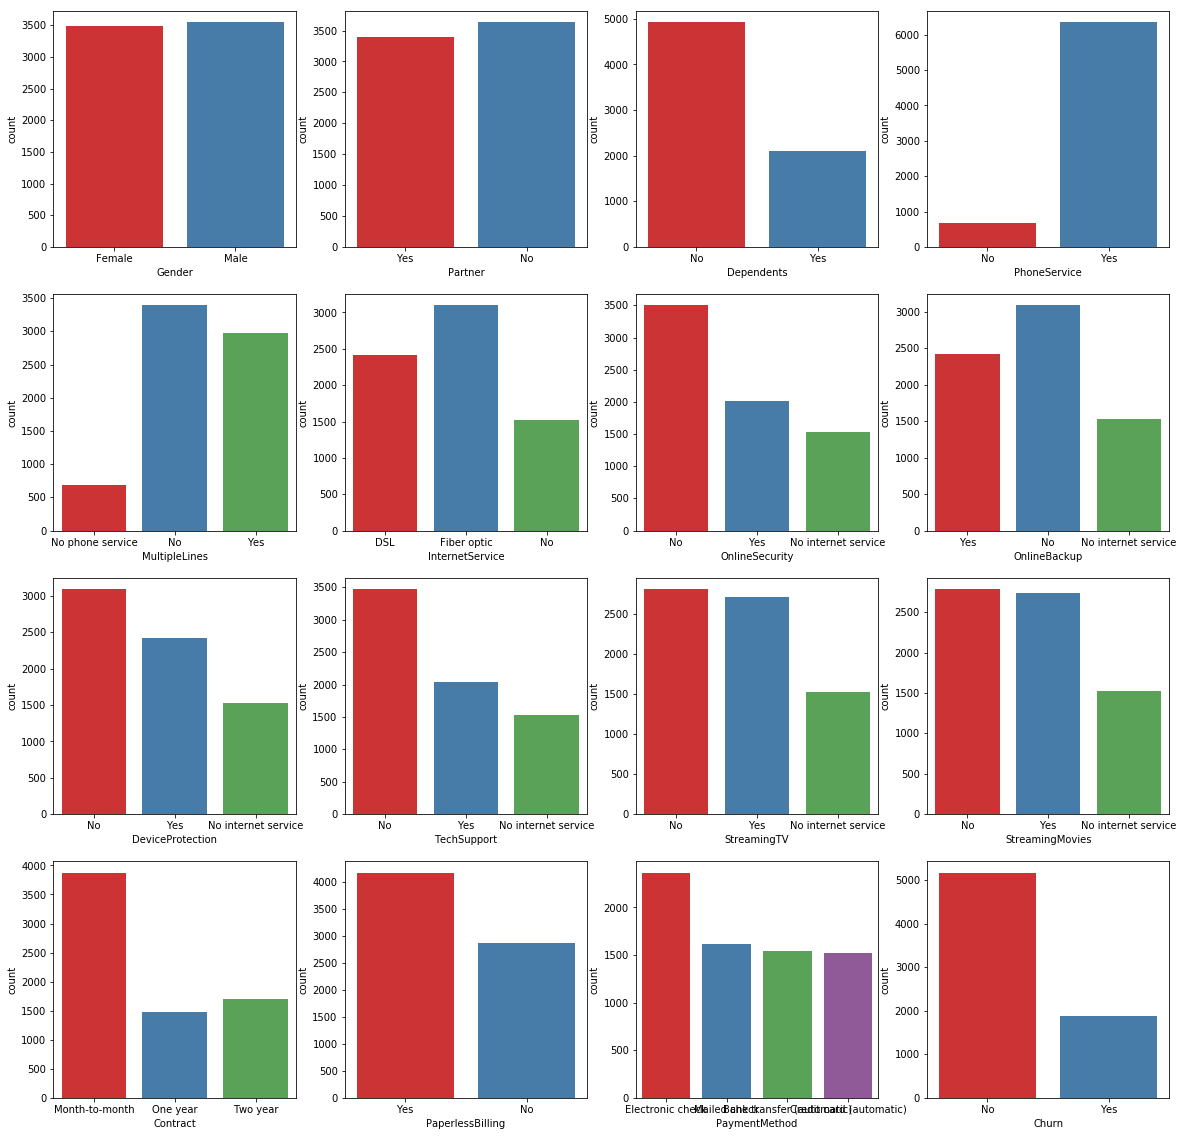

In [25]:
# Plotting the bar chart
rows = 4 ; columns = 4
f, axes = plt.subplots(rows, columns, figsize=(20, 20))
print('Univariate Analysis of each categorical Variables')
for row in range(rows):
    for column in range(columns):
        sns.countplot(datset_churn[columns_hist_nparray[row][column]], palette = "Set1", ax = axes[row, column])

#### Observations :
1. We have almost equal genders in our dataset
2. Almost 50% have partners
3. Around 30% have dependants
4. 85% of the customers have phone service
5. Around 40% customers have multiple lines
6. People prefer Fiber Optics over DSL for Internet
7. Around 30% have taken online security.Majority of Customer don't have Online security or backup
8. Close 35% prefer device protection
9. Majority of Customer don't have Tech Support
10. Around 37% have registered for Streaming TV & MOvie
11. Contract - Majority of customers are subscribed for Month to Month contract (55%)
12. Majority of customers have opted Paperless billing
13. Majority of customers pay eletronic check. 43 % prefer Automatic payment (Bank Transfer and Credit Card)
14. Target Variable - "Churn" - We have unbalanced distribution (Yes - Approx 1800 ; No - Approx 5000). So Churn positive is 25% (Approx).

### Vizualizing the Numeric variables
#### Histogram to see data distribution of Quantitative Variables(SeniorCitizen, tenure, MonthlyCharges, TotalCharges)


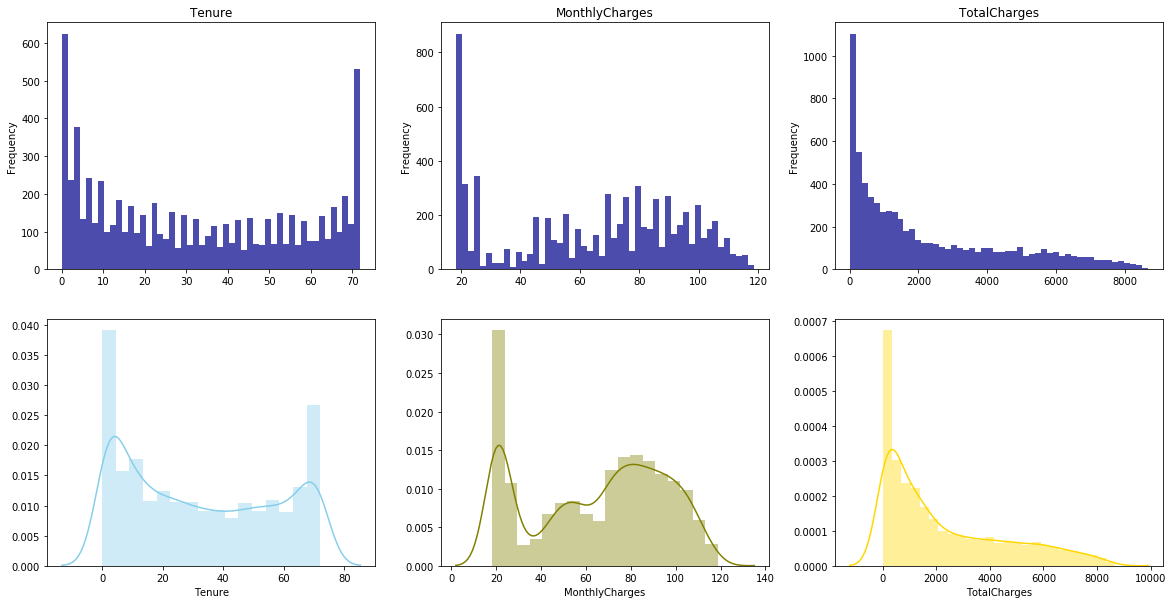

In [26]:
f, axes = plt.subplots(2, 3, figsize=(20,10))
#Charting the histogram
datset_churn["Tenure"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='Tenure',ax=axes[0, 0])
datset_churn["MonthlyCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='MonthlyCharges',ax=axes[0, 1])
datset_churn["TotalCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='TotalCharges',ax=axes[0, 2])

#Charting the density plot
sns.distplot( datset_churn["Tenure"] , kde=True, rug=False, color="skyblue", ax=axes[1, 0])
sns.distplot( datset_churn["MonthlyCharges"] , kde=True, rug=False, color="olive", ax=axes[1, 1])
sns.distplot( datset_churn["TotalCharges"] , kde=True, rug=False, color="gold", ax=axes[1, 2])

#### Observations:
1. Tenure:

    1.1. Not a normal distribution. Bi-Modal distribution (having 2 peaks) which means data is concentrated across two different groups
    
    1.2 We have major chunk of customers in 0-1 month period. Lot of them might be cutomers who tried the service and left or liked the service and continued
    
    1.3. Between 10 months to 65 months, we can see flat distribution of data.
    
    1.4. We have lot customers in 69-72 months range. They are the loyal customers
   
   
 2. Monthly Charges  - 
 
     2.1. Not a normal distribution.Close to Bi-Modal distribution
     
     2.2. Majority of customers are paying $18 to $20 dollars. Must be the service charge for basic service. Majority of customers are subscribed to basic package.
     
     2.3. Between $70-$100 dollars, we  have quite a number of customers. They might be the ones subscribed for multiple services.
     
     
 3. Total Charges - 
 
    3.1. Data is positively skewed.
    
    3.2. Majority of the population have spent close to $1,100 dollars
    
    3.3. Cutomers have spent upto $9,000  dollars 


#### Barchart for the Gender (0 is No , 1 is Yes)

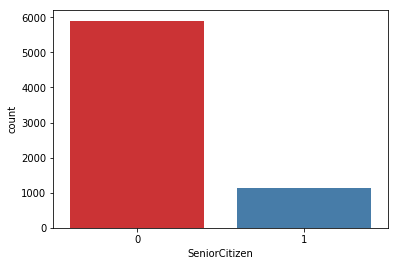

In [27]:
sns.countplot(datset_churn['SeniorCitizen'], palette = "Set1")

16% of customers are senior citizens

#### Let's Check for Outliers using Box Plot  for Tenure, MonthlyCharges, TotalCharges

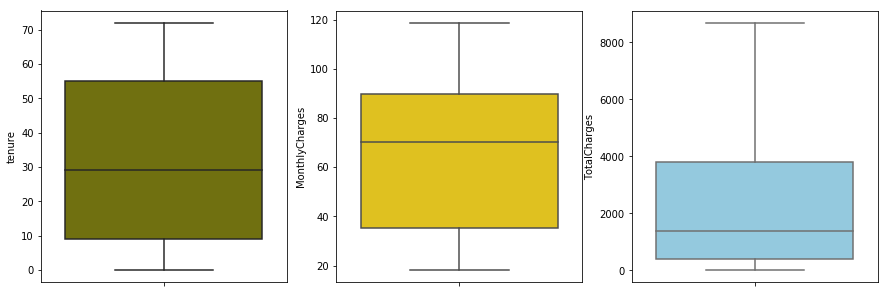

In [28]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=datset_churn_copy["tenure"], orient="v", color="olive",ax=axes[0])
sns.boxplot(x=datset_churn_copy["MonthlyCharges"], orient="v", color="gold",ax=axes[1])
sns.boxplot(x=datset_churn_copy["TotalCharges"] , orient="v", color="skyblue",ax=axes[2])

Observation - Seems like we dont have outliers !

## Bivariate Analysis
Correlating the features with Target column (Churn)
Let us start by understanding correlations between numerical features and our solution goal (Churn).

A histogram chart is useful for analyzing continous numerical variables like tenure , Monthly Charges and Total Charges where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands.

In [29]:
# Converting the categorical variable to numerical variable
datset_churn['Churn_Num'] = datset_churn['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [30]:
# Validating the mappaing
datset_churn[['Churn','Churn_Num']].head()

,Churn,Churn_Num
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


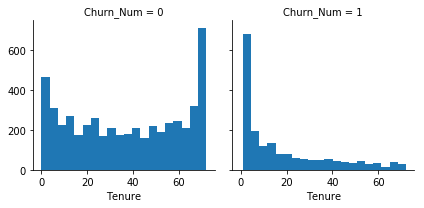

In [31]:
# Plotting Tenure Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(datset_churn, col='Churn_Num')
fighist.map(plt.hist, 'Tenure', bins=20) 

#### Observations:

1. Customer who left the Telco are mostly customers within 1st month (600+) and churn steady declines with time.
2. If customer can be retained between 10-20 months, there are high chances, customer will stay very long. Churn decreases over time
3. Customer at 72 month tenure, mostly stayed (Churn=0).

#### Decisions:

1. We should definitely use 'Tenure' column in our model training.
2. We should band 'Tenure'

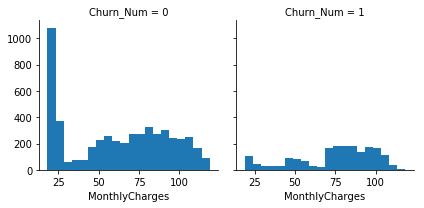

In [32]:
# Plotting MonthlyCharges Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(datset_churn, col='Churn_Num')
fighist.map(plt.hist, 'MonthlyCharges', bins=20)

#### Observation :
1. Majority of customers are in 18 to 20 range and they didn't leave
2. Customer Leaving are mostly in the bannd of 75-100  who have opted for multiple services.

#### Decisions :
1. We will use 'MonthlyCharges' column in our model training.
2. We should band 'MonthlyCharges'

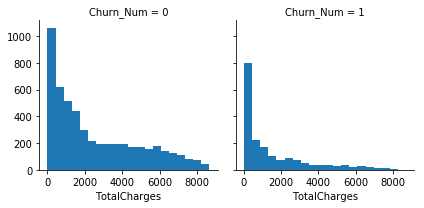

In [33]:
# Plotting TotalCharges Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(datset_churn, col='Churn_Num')
fighist.map(plt.hist, 'TotalCharges', bins=20)

#### Observation:
It's difficult to conclude anything using this column. Total charges are Tenure * MonthlyCharges . Tenur might me high and Monthly charges may be low and vice-versa. Data is positively skewed.

#### Decision
We will not use this column


### Now we will use the Categorical variables and their relationships with Churn

#### We will use Seaborn Categorical Plot

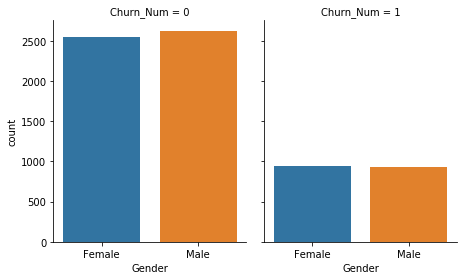

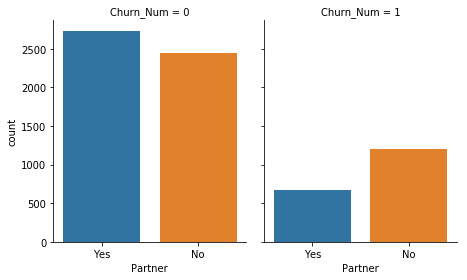

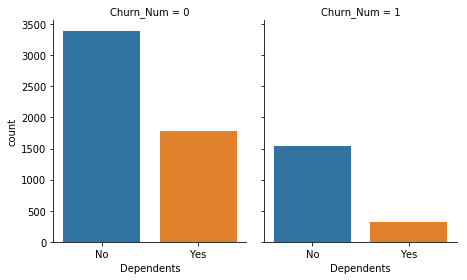

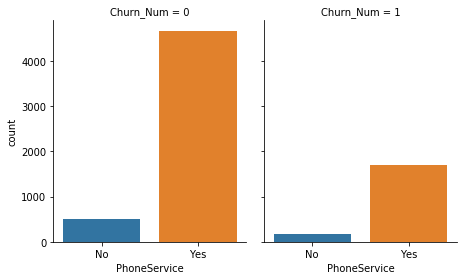

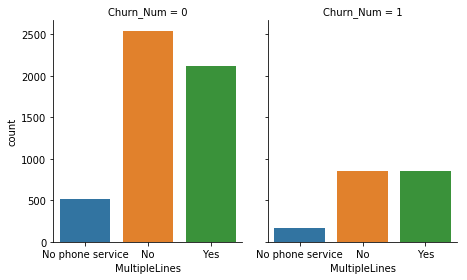

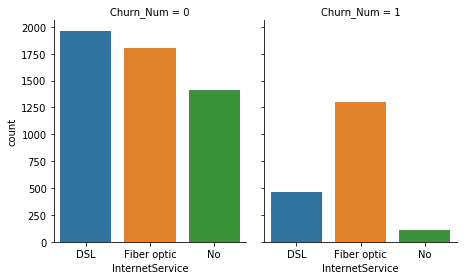

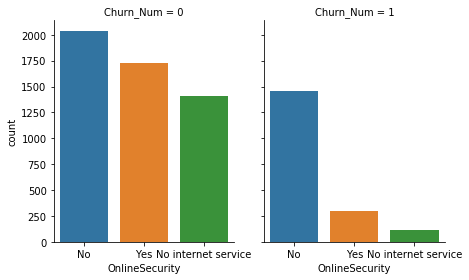

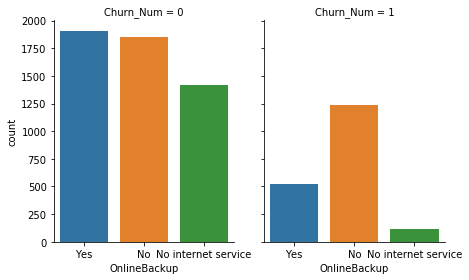

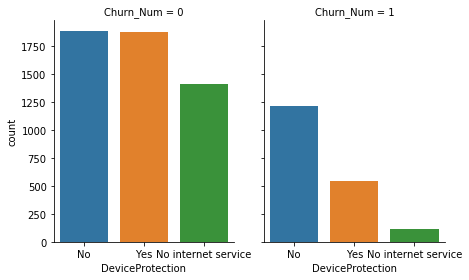

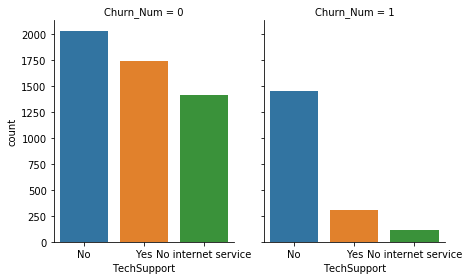

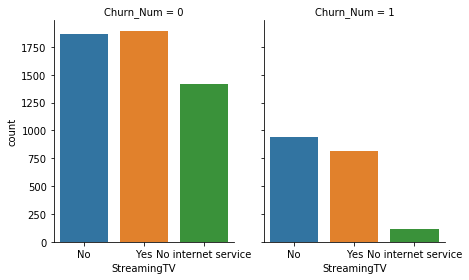

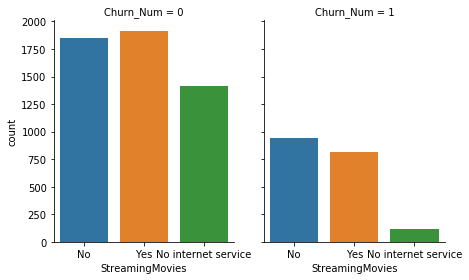

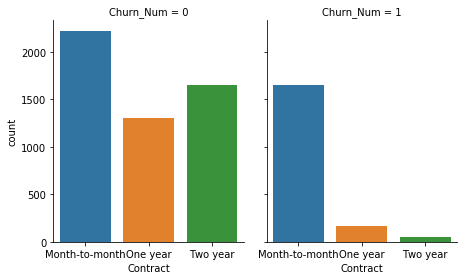

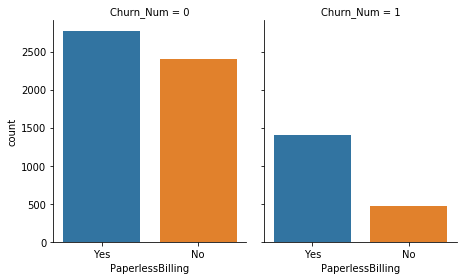

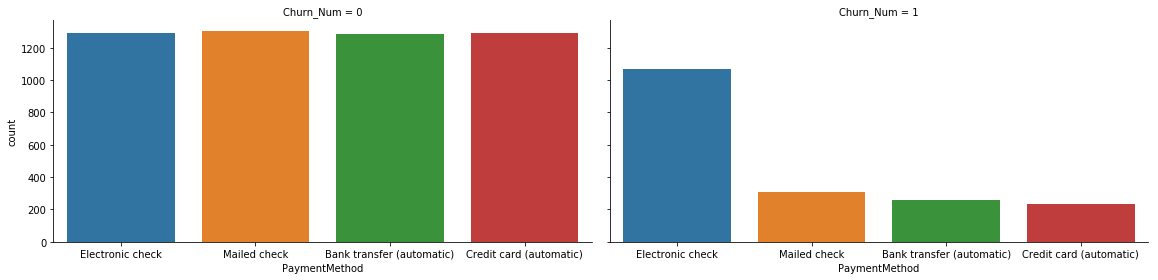

In [34]:
col_list = columns_hist
col_list.remove('Churn')
for col in col_list:
    if col == 'PaymentMethod':
        aspect_ratio = 2.0
    else:
        aspect_ratio = 0.8
        
    plot_cat_data = sns.catplot(x=col, col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=aspect_ratio)

#### Observations (Churn_Num - 1 is "Yes" ; 0 is "No") :
1. 'Gender'  : Difficult to determine Churn using this field. Counts are almost same  in either category
2. 'Partner' : Customer with partner have lower chance of leaving
3. 'Dependents' :Customer with dependants have lower chance of leaving. We will merge Partner & Dependant Columns as 1 column
4. 'PhoneService' & 'MultipleLines' : We will merge these columns into PhoneLines - Single & Multiple and determine
5. 'InternetService' : Customer with Fiber Optic Interner Service have higher chances of leaving
6. 'OnlineSecurity' & 'OnlineBackup' : We will merge these columns for better visibility
7. 'DeviceProtection' : Customers without device protection have likely higher chances of leaving
8. 'TechSupport' - Customer not opting for TechSupport have higher chances of leaving 
9. 'StreamingTV', 'StreamingMovies' - We will merge these columns into streaming and check again
10. 'Contract' - Month to Month customers have likely higher chances to leave
11. 'PaperlessBilling' - Customers with paperless billing have higher chances of leaving
12. 'PaymentMethod' - People paying with electronic check have higher chances of leaving

### Creating new feature from existing set of columns using the above observations

#### Creating bands for numerical variables - Tenure & Monthly Charges

In [35]:
# Creating tenure band and co-relation with Churn
datset_churn['TenureRange'] = pd.cut(datset_churn['Tenure'], 5)
datset_churn[['TenureRange', 'Churn_Num']].groupby(['TenureRange'], as_index=False).mean().sort_values(by='TenureRange', ascending=True)

# Replacing Age band with ordinals based on these bands
datset_churn.loc[ datset_churn['Tenure'] <= 8, 'TenureCat'] = 0
datset_churn.loc[(datset_churn['Tenure'] > 8) & (datset_churn['Tenure'] <= 15), 'TenureCat'] = 1
datset_churn.loc[(datset_churn['Tenure'] > 15) & (datset_churn['Tenure'] <= 30), 'TenureCat'] = 2
datset_churn.loc[(datset_churn['Tenure'] > 30) & (datset_churn['Tenure'] <= 45 ), 'TenureCat'] = 3
datset_churn.loc[(datset_churn['Tenure'] > 45) & (datset_churn['Tenure'] <= 60 ), 'TenureCat'] = 4
datset_churn.loc[ datset_churn['Tenure'] > 60, 'TenureCat'] = 5

datset_churn[['Tenure','TenureRange','TenureCat']].head(10)

,Tenure,TenureRange,TenureCat
0,1,"(-0.072, 14.4]",0.0
1,34,"(28.8, 43.2]",3.0
2,2,"(-0.072, 14.4]",0.0
3,45,"(43.2, 57.6]",3.0
4,2,"(-0.072, 14.4]",0.0
5,8,"(-0.072, 14.4]",0.0
6,22,"(14.4, 28.8]",2.0
7,10,"(-0.072, 14.4]",1.0
8,28,"(14.4, 28.8]",2.0
9,62,"(57.6, 72.0]",5.0


In [36]:
# Creating MonthlyCharges Band and co-relation with Churn
datset_churn['MonthlyChargesRange'] = pd.cut(datset_churn['MonthlyCharges'], 5)
datset_churn[['MonthlyChargesRange', 'Churn_Num']].groupby(['MonthlyChargesRange'], as_index=False).mean().sort_values(by='MonthlyChargesRange', ascending=True)

# Replacing Age band with ordinals based on these bands
datset_churn.loc[ datset_churn['MonthlyCharges'] <= 20, 'MonthlyChargesCat'] = 0
datset_churn.loc[(datset_churn['MonthlyCharges'] > 20) & (datset_churn['MonthlyCharges'] <= 40), 'MonthlyChargesCat'] = 1
datset_churn.loc[(datset_churn['MonthlyCharges'] > 40) & (datset_churn['MonthlyCharges'] <= 60), 'MonthlyChargesCat'] = 2
datset_churn.loc[(datset_churn['MonthlyCharges'] > 60) & (datset_churn['MonthlyCharges'] <= 80 ), 'MonthlyChargesCat'] = 3
datset_churn.loc[(datset_churn['MonthlyCharges'] > 80) & (datset_churn['MonthlyCharges'] <= 100 ), 'MonthlyChargesCat'] = 4
datset_churn.loc[ datset_churn['MonthlyCharges'] > 100, 'MonthlyChargesCat'] = 5

#Checking the categories
datset_churn[['MonthlyCharges','MonthlyChargesRange','MonthlyChargesCat']].head(10)

,MonthlyCharges,MonthlyChargesRange,MonthlyChargesCat
0,29.85,"(18.15, 38.35]",1.0
1,56.95,"(38.35, 58.45]",2.0
2,53.85,"(38.35, 58.45]",2.0
3,42.30,"(38.35, 58.45]",2.0
4,70.70,"(58.45, 78.55]",3.0
5,99.65,"(98.65, 118.75]",4.0
6,89.10,"(78.55, 98.65]",4.0
7,29.75,"(18.15, 38.35]",1.0
8,104.80,"(98.65, 118.75]",5.0
9,56.15,"(38.35, 58.45]",2.0


#### Creating new derived columns for Categorical variables

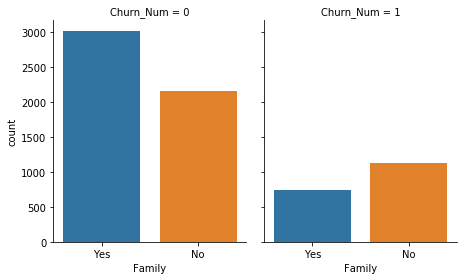

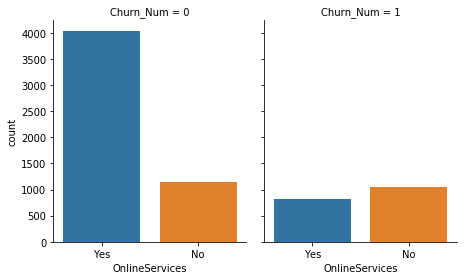

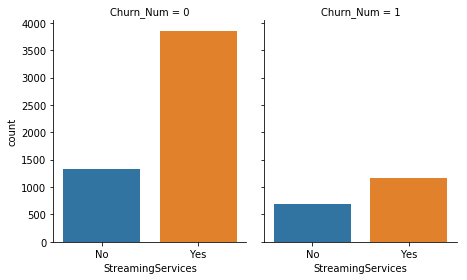

In [37]:
#Creating a new column for family. If a customer has dependant or Partner, I am considering it as family .
list_family = []
for rows in range(len(datset_churn['Partner'])):
    if ((datset_churn['Partner'][rows] == 'No') and (datset_churn['Dependents'][rows] == 'No')):
        list_family.append('No')
    else:
        list_family.append('Yes')
datset_churn['Family'] = list_family
#print(datset_churn[['Partner', 'Dependents', 'Family' ]].head(10))

#Creating a new column for Online Services (Online Security & Online Backup) . If a customer has Online Security or Online Backup services
#then , I am considering it as "Yes" else "No"
list_online_services = []
for rows_os in range(len(datset_churn['OnlineSecurity'])):
    if ((datset_churn['OnlineSecurity'][rows_os] == 'No') and (datset_churn['OnlineBackup'][rows_os] == 'No')):
        list_online_services.append('No')
    else:
        list_online_services.append('Yes')
datset_churn['OnlineServices'] = list_online_services

#print(datset_churn[['OnlineSecurity', 'OnlineBackup', 'OnlineServices' ]].head(10))
 
#Creating a new column for Streaming Services (StreamingTV & StreamingMovies) . If a customer has StreamingTV or StreamingMovies
#then , I am considering it as "Yes" else "No"
list_streaming_services = []
for rows_stv in range(len(datset_churn['StreamingTV'])):
    if ((datset_churn['StreamingTV'][rows_stv] == 'No') and (datset_churn['StreamingMovies'][rows_stv] == 'No')):
        list_streaming_services.append('No')
    else:
        list_streaming_services.append('Yes')
datset_churn['StreamingServices'] = list_streaming_services

#print(datset_churn[['StreamingTV', 'StreamingMovies', 'StreamingServices' ]].head(10))

plot_cat_data = sns.catplot(x='Family', col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=0.8)
plot_cat_data = sns.catplot(x='OnlineServices', col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=0.8)
plot_cat_data = sns.catplot(x='StreamingServices', col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=0.8)

#### Observation
 - Customers with family are less likely to Churn
 - Customers not opted for online services (online backup or security) have slightly higher chances of churn
 - Customer opted for Streaming Services seems to have slightly higher chances of churn

## Preparing Columns for Classification

### Converting the Object/Categorical Variable to Numerical Variable

In [464]:
datset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
CustomerID             7043 non-null object
Gender                 7043 non-null object
SeniorCitizen          7043 non-null int64
Partner                7043 non-null object
Dependents             7043 non-null object
Tenure                 7043 non-null int64
PhoneService           7043 non-null object
MultipleLines          7043 non-null object
InternetService        7043 non-null object
OnlineSecurity         7043 non-null object
OnlineBackup           7043 non-null object
DeviceProtection       7043 non-null object
TechSupport            7043 non-null object
StreamingTV            7043 non-null object
StreamingMovies        7043 non-null object
Contract               7043 non-null object
PaperlessBilling       7043 non-null object
PaymentMethod          7043 non-null object
MonthlyCharges         7043 non-null float64
TotalCharges           7043 non-null float64
Churn        

In [38]:
#Converting Gender column to numeric value
#datset_churn['Gender'].unique() # Print unique values in the column
datset_churn['Gender_Num'] = datset_churn['Gender'].map( {'Female': 1, 'Male': 0} ).astype(int) #Map Categorical to Numerical Values
datset_churn[['Gender','Gender_Num']].head(2) # Test the mapping

,Gender,Gender_Num
0,Female,1
1,Male,0


In [39]:
# For Partner & Dependant , we created Family Column . Converting Family column to numeric value
#datset_churn['Family'].unique() # Print unique values in the column
datset_churn['Family_Num'] = datset_churn['Family'].map( {'Yes': 1, 'No': 0} ).astype(int) #Map Categorical to Numerical Values
datset_churn[['Family','Family_Num']].head(2) # Test the mapping

,Family,Family_Num
0,Yes,1
1,No,0


In [40]:
datset_churn['PhoneService_Num'] = datset_churn['PhoneService'].map( {'Yes': 1, 'No': 0} ).astype(int)
datset_churn['MultipleLines_Num'] = datset_churn['MultipleLines'].map( {'No': 0, 'Yes': 1, 'No phone service':2} ).astype(int)
datset_churn['InternetService_Num'] = datset_churn['InternetService'].map( {'DSL': 0, 'Fiber optic': 1, 'No':2} ).astype(int)
datset_churn['OnlineServices_Num'] = datset_churn['OnlineServices'].map( {'Yes': 1, 'No': 0} ).astype(int)

datset_churn['DeviceProtection_Num'] = datset_churn['DeviceProtection'].map( {'No': 0, 'Yes': 1, 'No internet service':2} ).astype(int)
datset_churn['StreamingServices_Num'] = datset_churn['StreamingServices'].map( {'Yes': 1, 'No': 0} ).astype(int)
datset_churn['TechSupport_Num'] = datset_churn['TechSupport'].map( {'No': 0, 'Yes': 1, 'No internet service':2} ).astype(int)
datset_churn['Contract_Num'] = datset_churn['Contract'].map( {'Month-to-month': 0, 'One year': 1, 'Two year': 2} ).astype(int)
datset_churn['PaperlessBilling_Num'] = datset_churn['PaperlessBilling'].map( {'Yes': 1, 'No': 0} ).astype(int)
datset_churn['PaymentMethod_Num'] = datset_churn['PaymentMethod'].map( {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2 , 'Credit card (automatic)' : 3} ).astype(int)

In [41]:
datset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
CustomerID               7043 non-null object
Gender                   7043 non-null object
SeniorCitizen            7043 non-null int64
Partner                  7043 non-null object
Dependents               7043 non-null object
Tenure                   7043 non-null int64
PhoneService             7043 non-null object
MultipleLines            7043 non-null object
InternetService          7043 non-null object
OnlineSecurity           7043 non-null object
OnlineBackup             7043 non-null object
DeviceProtection         7043 non-null object
TechSupport              7043 non-null object
StreamingTV              7043 non-null object
StreamingMovies          7043 non-null object
Contract                 7043 non-null object
PaperlessBilling         7043 non-null object
PaymentMethod            7043 non-null object
MonthlyCharges           7043 non-null float64
TotalCharges        

### Now we will delete the non-required rows and prepare the dataset for classification

In [42]:
# Take a copy of dataset
datset_churn_copy = datset_churn.copy()

In [43]:
#Dropping the Categorical columns and keeping their equivalent numeric column
columns_to_drop = ['Gender', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'Family', 'OnlineServices', 'StreamingServices']
datset_churn = datset_churn.drop(columns_to_drop, axis=1)

#Re-arranging the columns as per origial dataset
datset_churn = datset_churn[['CustomerID', 'Gender_Num', 'SeniorCitizen', 'Family_Num', 'TenureCat', 'PhoneService_Num', 'MultipleLines_Num', 'InternetService_Num', 'OnlineServices_Num', 'DeviceProtection_Num', 'TechSupport_Num', 'StreamingServices_Num', 'Contract_Num', 'PaperlessBilling_Num', 'PaymentMethod_Num', 'MonthlyChargesCat', 'Churn_Num']]
datset_churn = datset_churn.rename(columns={'Gender_Num' : 'Gender', 
                             'Family_Num' : 'Family',
                             'PhoneService_Num' : 'PhoneService',
                             'MultipleLines_Num': 'MultipleLines', 
                             'InternetService_Num' : 'InternetService', 
                             'OnlineServices_Num' : 'OnlineServices', 
                             'DeviceProtection_Num' : 'DeviceProtection',
                             'TechSupport_Num' : 'TechSupport', 
                             'StreamingServices_Num' : 'StreamingServices', 
                             'Contract_Num' : 'Contract', 
                             'PaperlessBilling_Num' : 'PaperlessBilling', 
                             'PaymentMethod_Num' : 'PaymentMethod', 
                             'MonthlyCharges' : 'MonthlyCharges', 
                             'Churn_Num' :  'Churn' })
datset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
CustomerID           7043 non-null object
Gender               7043 non-null int32
SeniorCitizen        7043 non-null int64
Family               7043 non-null int32
TenureCat            7043 non-null float64
PhoneService         7043 non-null int32
MultipleLines        7043 non-null int32
InternetService      7043 non-null int32
OnlineServices       7043 non-null int32
DeviceProtection     7043 non-null int32
TechSupport          7043 non-null int32
StreamingServices    7043 non-null int32
Contract             7043 non-null int32
PaperlessBilling     7043 non-null int32
PaymentMethod        7043 non-null int32
MonthlyChargesCat    7043 non-null float64
Churn                7043 non-null int32
dtypes: float64(2), int32(13), int64(1), object(1)
memory usage: 577.8+ KB


In [44]:
datset_churn.head(10) # Taking a quick look into the new data

,CustomerID,Gender,SeniorCitizen,Family,TenureCat,PhoneService,MultipleLines,InternetService,OnlineServices,DeviceProtection,TechSupport,StreamingServices,Contract,PaperlessBilling,PaymentMethod,MonthlyChargesCat,Churn
0,7590-VHVEG,1,0,1,0.0,0,2,0,1,0,0,0,0,1,0,1.0,0
1,5575-GNVDE,0,0,0,3.0,1,0,0,1,1,0,0,1,0,1,2.0,0
2,3668-QPYBK,0,0,0,0.0,1,0,0,1,0,0,0,0,1,1,2.0,1
3,7795-CFOCW,0,0,0,3.0,0,2,0,1,1,1,0,1,0,2,2.0,0
4,9237-HQITU,1,0,0,0.0,1,0,1,0,0,0,0,0,1,0,3.0,1
5,9305-CDSKC,1,0,0,0.0,1,1,1,0,1,0,1,0,1,0,4.0,1
6,1452-KIOVK,0,0,1,2.0,1,1,1,1,0,0,1,0,1,3,4.0,0
7,6713-OKOMC,1,0,0,1.0,0,2,0,1,0,0,0,0,0,1,1.0,0
8,7892-POOKP,1,0,1,2.0,1,1,1,0,1,1,1,0,1,0,5.0,1
9,6388-TABGU,0,0,1,5.0,1,0,0,1,0,0,0,1,0,2,2.0,0


In [46]:
X = datset_churn.iloc[:,1:16].values # Feature Variable
y = datset_churn.iloc[:,16].values # Target Variable

#Dividing data into test & train splitting 70% data for training anf 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 5634 samples in the training set and 1409 samples in the test set


## Classification
### We will run all classifiers to have an initial look at the performance

#### Defining function for Confusion Matrix , Precision, Recall and F1 Score

In [47]:
#Creating function for Confusion Matrix , Precsion, Recall and F1 Score
def plot_confusion_matrix(classifier, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Churn-No','Churn-Yes']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;

#### Defining function for Precision Recall Curve

In [48]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

### Master Classification Engine


 LogisticRegression 



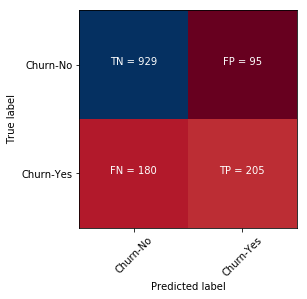

Recall=0.532 
Precision=0.683
F1=0.599
Average precision-recall score: 0.663


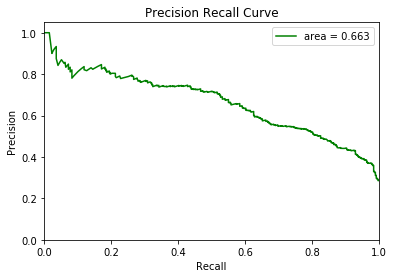


 KNeighborsClassifier 



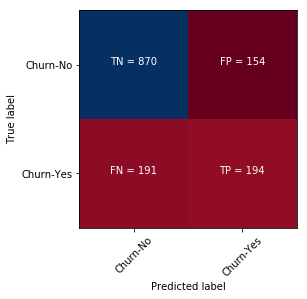

Recall=0.504 
Precision=0.557
F1=0.529
Average precision-recall score: 0.516


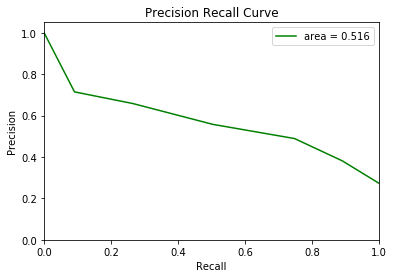


 GaussianNB 



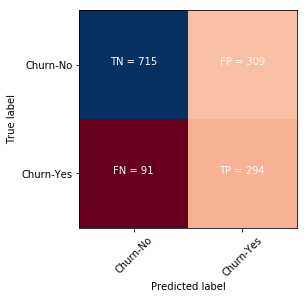

Recall=0.764 
Precision=0.488
F1=0.595
Average precision-recall score: 0.647


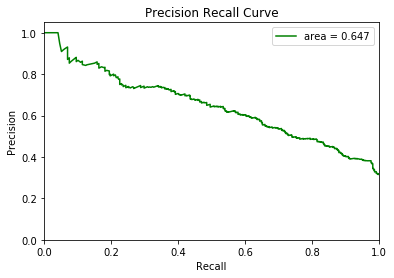


 SVC 



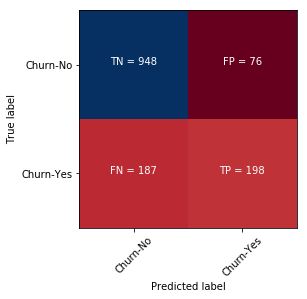

Recall=0.514 
Precision=0.723
F1=0.601
Average precision-recall score: 0.651


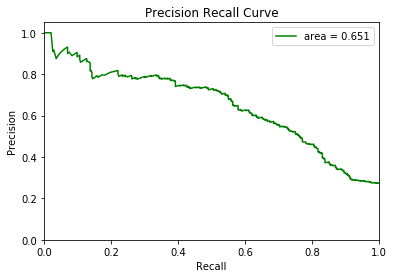


 DecisionTreeClassifier 



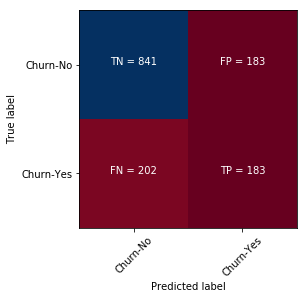

Recall=0.475 
Precision=0.500
F1=0.487
Average precision-recall score: 0.382


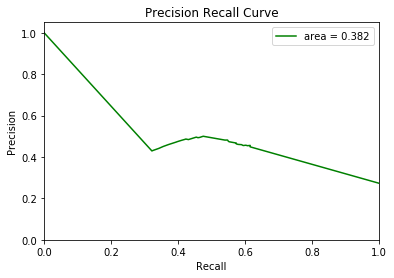


 RandomForestClassifier 



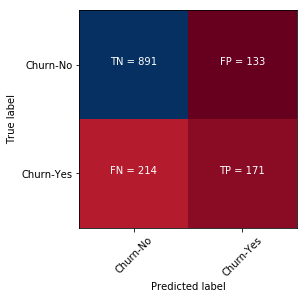

Recall=0.444 
Precision=0.562
F1=0.496
Average precision-recall score: 0.526


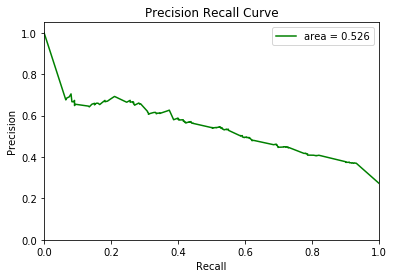


 SGDClassifier 



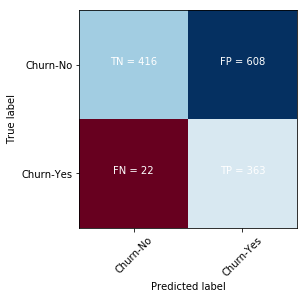

Recall=0.943 
Precision=0.374
F1=0.535
Average precision-recall score: 0.549


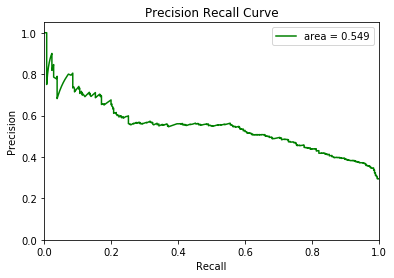


 AdaBoostClassifier 



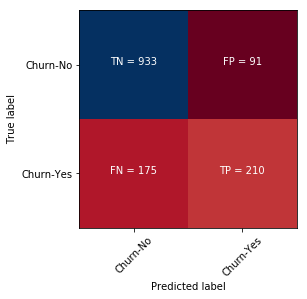

Recall=0.545 
Precision=0.698
F1=0.612
Average precision-recall score: 0.674


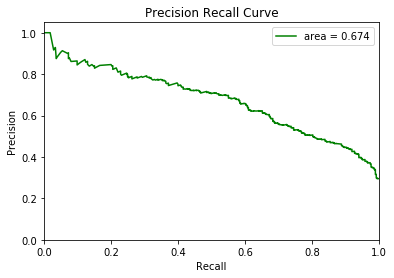

In [51]:
# Making a list of all classifiers
classifier_model = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(), SGDClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []

for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(X_test)
    except:
        y_pred_score = classifier.predict_proba(X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    
    
    #Confusion Matrix
    plot_confusion_matrix(classifier_list.__class__.__name__, y_test, y_pred_test)
    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)

### CLASSIFICATION MODEL PERFORMANCE EVALUATION

In [52]:
#Creating pandas dataframe with Model and corresponding accuracy
#accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Test Accuracy':classifier_accuracy_test, 'Train Accuracy' :classifier_accuracy_train , 'Precision':precisionscore, 'Recall':recallscore ,'F1 Score':f1score},index=None)
accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Cross Val Score':cv_score, 'Test Accuracy' :classifier_accuracy_train , 'Precision':precisionscore, 'Recall':recallscore ,'Avg Precision Recall':avg_pre_rec_score ,'F1 Score':f1score})

# Calculating Average Accuracy = (Test + Train)/2
accuracy_df['Average_Accuracy'] =  (accuracy_df['Cross Val Score'] + accuracy_df['Test Accuracy'] )/ 2

#Arranging the Columns
print("\n*------------------------------    CLASSIFICATION MODEL PERFORMANCE EVALUATION      ---------------------*\n")
accuracy_df = accuracy_df[['Model','Cross Val Score', 'Test Accuracy', 'Average_Accuracy','Precision', 'Recall','Avg Precision Recall','F1 Score']]  # This will arrange the columns in the order we want

#Sorting the Columns based on Average Accuracy
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True) # Sorting the data with highest accuracy in the top
accuracy_df
#accuracy_df.transpose()


*------------------------------    CLASSIFICATION MODEL PERFORMANCE EVALUATION      ---------------------*



,Model,Cross Val Score,Test Accuracy,Average_Accuracy,Precision,Recall,Avg Precision Recall,F1 Score
5,RandomForestClassifier,0.764294,0.9290,0.846647,0.562500,0.444156,0.525998,0.496372
4,DecisionTreeClassifier,0.730566,0.9395,0.835033,0.500000,0.475325,0.382063,0.487350
3,SVC,0.798731,0.8076,0.803166,0.722628,0.514286,0.650592,0.600910
0,LogisticRegression,0.802106,0.8039,0.803003,0.683333,0.532468,0.663086,0.598540
7,AdaBoostClassifier,0.799797,0.8026,0.801198,0.697674,0.545455,0.674440,0.612245
1,KNeighborsClassifier,0.762881,0.8387,0.800790,0.557471,0.503896,0.516306,0.529332
2,GaussianNB,0.736608,0.7368,0.736704,0.487562,0.763636,0.647102,0.595142
6,SGDClassifier,0.766244,0.5424,0.654322,0.373841,0.942857,0.549295,0.535398


#### Observations

1. Since our dataset class is imbalanced. Churn "Yes" is almost 3 times as "No', Accuracy is not the right measure and we have to consider Precision, Recall and F1 Score for further evaluation and improvement of model
    
    1.1 Precision: A measure of a classifiers exactness.A low precision can also indicate a large number of False Positives.
    
    1.2 Recall: A measure of a classifiers completeness.A low recall indicates many False Negatives.
    
    1.3 F1 Score (or F-score): A weighted average or Harmonic Mean of precision and recall.

2. Logistic Regression (AUC = 0.66) and Adaboost model (AUC = 0.67) looks promising. Let's try to improve the model

## Improving our Model: Model Tuning
### Grid Search for Logistic Regression Classifier and running with optimized hyperparameters

In [53]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier

#Logistic Regression Classifier
clf = LogisticRegression()

#Hyperparameters
parameters = {'C':np.logspace(0, 4, 10), 
              'penalty' : ['l1', 'l2']
             }

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# View best hyperparameters
#print(grid_srchfit.best_params_)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print (best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.8048
F-score on testing data: 0.6467

Optimized Model
------
Final accuracy score on the testing data: 0.8041
Final F-score on the testing data: 0.6451
LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


### Grid Search for Adaboost Classifier and running with optimized hyperparameters

In [54]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score

# TODO: Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120], 
              'learning_rate':[0.1, 0.5, 1.],
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),
              'base_estimator__max_depth' : np.arange(1, 4, 1)
             }

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters,scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print (best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.7388
F-score on testing data: 0.5185

Optimized Model
------
Final accuracy score on the testing data: 0.8041
Final F-score on the testing data: 0.6452
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=120, random_state=None)


Observations:
Both Logistic Regression & Adaboost Classifier gives us final F score of 0.65  and accuracy of 0.80 post grid search.

## Feature Importance
### In this section , we will run scikit learn feature importances to evaluate which columns are being give higher weights

In [71]:
# Feature Importance for Adaboost
from sklearn.feature_selection import RFE
features = list(datset_churn.columns[1:16])

# Feature Importance for AdaBoostClassifier
adboost_cls = AdaBoostClassifier()
adboost_cls .fit(X_train, y_train)
feature_imp_adboost = np.round(adboost_cls.feature_importances_, 5)

feature_imp_df = pd.DataFrame({'Features' :features, 'Adaboost_Score': feature_imp_adboost})
feature_imp_df.sort_values('Adaboost_Score', axis=0, ascending=False, inplace=True)
print(feature_imp_df)

             Features  Adaboost_Score
11           Contract            0.18
14  MonthlyChargesCat            0.18
3           TenureCat            0.14
13      PaymentMethod            0.12
6     InternetService            0.08
9         TechSupport            0.06
5       MultipleLines            0.04
8    DeviceProtection            0.04
10  StreamingServices            0.04
12   PaperlessBilling            0.04
1       SeniorCitizen            0.02
2              Family            0.02
4        PhoneService            0.02
7      OnlineServices            0.02
0              Gender            0.00


#### Observation:

1. Overall - Contract, Monthly Charges, Tenure and Payment Method and Internet Service are leading columns contributing to churn. They consitute 60% weight from Mean_Feature_Importance

2. Gender has no impact on Churn

### Now we will create the dataset with top 5 columns and run Adaboost classifier to see if there is any improvement in performance

In [63]:
dataset_churn_new = datset_churn[['Contract', 'MonthlyChargesCat', 'TenureCat', 'PaymentMethod', 'Churn']]
X_new = dataset_churn_new.iloc[:,:-1].values # Feature Variable
y_new = dataset_churn_new.iloc[:,-1].values # Target Variable

#Dividing data into test & train splitting 70% data for training anf 30% for test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new , y_new, test_size=0.20)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train_new.shape[0], X_test_new.shape[0]))

There are 5634 samples in the training set and 1409 samples in the test set



 Adaboost Classifier 



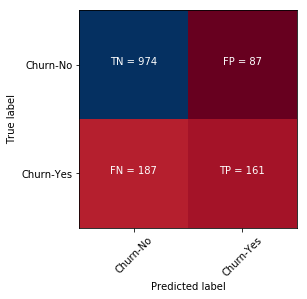

Recall=0.463 
Precision=0.649
F1=0.540
Average precision-recall score: 0.617


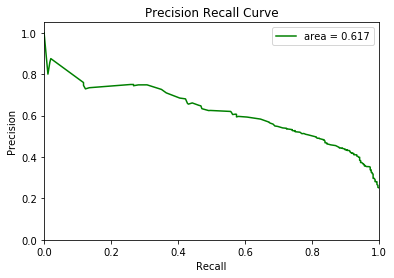

In [64]:
#Adaboost Classifier , filled the hyperparameter from the Grid Search
classifier = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=120, random_state=None)
 
# Fitting the training set into classification model
classifier.fit(X_train_new, y_train_new)
    
# Predicting the output on test datset
y_pred_new = classifier.predict(X_test_new)    

try:
    y_pred_new_score = classifier.decision_function(X_test_new)
except:
    y_pred_new_score = classifier.predict_proba(X_test_new)[:,1]
    
#Confusion Matrix and Precision Recall Curve
plot_confusion_matrix('Adaboost Classifier', y_test_new, y_pred_new)
plot_prec_rec_curve('Adaboost Classifier', y_test_new, y_pred_new_score)


 Logistic Regression 



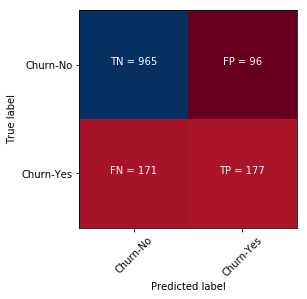

Recall=0.509 
Precision=0.648
F1=0.570
Average precision-recall score: 0.608


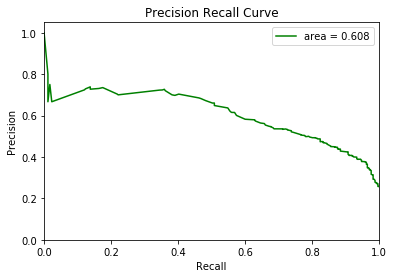

In [66]:
#Logistic Regression , filled the hyperparameter from the Grid Search
classifier_logreg = LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
 
# Fitting the training set into classification model
classifier_logreg.fit(X_train_new, y_train_new)
    
# Predicting the output on test datset
y_pred_new = classifier_logreg.predict(X_test_new)    

try:
    y_pred_new_score = classifier_logreg.decision_function(X_test_new)
except:
    y_pred_new_score = classifier_logreg.predict_proba(X_test_new)[:,1]
    
#Confusion Matrix and Precision Recall Curve
plot_confusion_matrix('Logistic Regression', y_test_new, y_pred_new)
plot_prec_rec_curve('Logistic Regression', y_test_new, y_pred_new_score)

## Conclusion
Adaboost classifier performed well with Precision Recall Curve -  0.62
Contract, Monthly Charges, Tenure and Payment Method and Internet Service are leading columns contributing to churn

Model can be further improved using the strategies discussed in next paragragh.

### Handling Imbalaced Dataset :

1. Increasing the number of instances of the minority class (This case Churn = 'Yes') . We need more data with Churn Class as "Yes".
2. Decreasing the number of instances of majority class
3. Random Under-Sampling
4. Random Over-Sampling
5. Cluster-Based Over Sampling
6. Synthetic Minority Over-sampling Technique(SMOTE)

Detailed explanation - https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Hope you enjoyed the kernel. Thank You!
Jagannath Banerjee | jagannath.banerjee@gmail.com | https://www.linkedin.com/in/jagannath-banerjee/ | Aug 2018